In [2]:
! pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [4]:
target = new_client.target
target_query = target.search('Alzheimers')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Nucleosome-remodeling factor subunit BPTF,6.0,False,CHEMBL3085621,"[{'accession': 'Q12830', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Nicastrin,5.0,False,CHEMBL3418,"[{'accession': 'Q92542', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,Gamma-secretase,5.0,False,CHEMBL2094135,"[{'accession': 'Q96BI3', 'component_descriptio...",PROTEIN COMPLEX,9606
3,[],Rattus norvegicus,Amyloid-beta A4 protein,4.0,False,CHEMBL3638365,"[{'accession': 'P08592', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Mus musculus,Amyloid-beta A4 protein,4.0,False,CHEMBL4523942,"[{'accession': 'P12023', 'component_descriptio...",SINGLE PROTEIN,10090
5,[],Homo sapiens,Amyloid-beta A4 protein,3.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606


In [5]:
selected_target = targets.target_chembl_id[5]
selected_target

'CHEMBL2487'

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,None,None,25720807,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1716,None,None,25720808,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1717,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720809,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1718,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720810,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,26.6


In [7]:
df.to_csv('bioactivity_data_raw.csv', index=False)
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,None,None,25720807,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1716,None,None,25720808,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1717,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720809,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,50.0
1718,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25720810,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5390772,Inhibition of amyloid beta 42 (unknown origin)...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,26.6


In [8]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [9]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0
...,...,...,...
1715,CHEMBL448891,COc1cc2c(cc1OC)[C@@H]1Cc3ccc(O)c(OC)c3CN1CC2,50000.0
1716,CHEMBL1235966,COc1cc2c(cc1O)[C@@H]1Cc3ccc(OC)c(O)c3CN1CC2,50000.0
1717,CHEMBL5434024,COc1cc2c(cc1O)CC[n+]1cc3c(OC)c(O)ccc3cc1-2,50000.0
1718,CHEMBL5411138,COC1=C(CC(=O)CCc2ccccc2)C(=O)O[C@@H]1O,26600.0


In [10]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4.dropna(inplace=True)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1493,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,inactive
1494,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,inactive
1495,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,3.0,inactive
1496,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,3.0,inactive


In [11]:
df4.to_csv('bioactivity_data_preprocessed.csv', index=False)
df4.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive


In [12]:
! pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 35.1 MB/s eta 0:00:00


In [13]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [14]:
df = pd.read_csv('/content/bioactivity_data_preprocessed.csv')

In [15]:
df = df[df['canonical_smiles'].notna()]
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1319,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,inactive
1320,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,inactive
1321,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,3.0,inactive
1322,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,3.0,inactive


In [16]:
def lipinski(smiles, verbose=False):
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)


    baseData = np.arange(1,1)
    i = 0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i == 0):
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i + 1

    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors


In [17]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.422,3.3188,1.0,2.0
1,299.461,3.2412,1.0,3.0
2,311.422,3.3188,1.0,2.0
3,327.877,3.8331,1.0,2.0
4,372.328,3.9422,1.0,2.0
...,...,...,...,...
1319,489.267,4.1591,2.0,5.0
1320,489.267,4.1591,2.0,5.0
1321,449.408,3.5767,2.0,6.0
1322,449.408,3.5767,2.0,6.0


In [18]:
df_combined = pd.concat([df, df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate,311.422,3.3188,1.0,2.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate,299.461,3.2412,1.0,3.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate,311.422,3.3188,1.0,2.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive,327.877,3.8331,1.0,2.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive,372.328,3.9422,1.0,2.0
...,...,...,...,...,...,...,...,...
1319,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,inactive,489.267,4.1591,2.0,5.0
1320,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,inactive,489.267,4.1591,2.0,5.0
1321,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,3.0,inactive,449.408,3.5767,2.0,6.0
1322,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,3.0,inactive,449.408,3.5767,2.0,6.0


In [19]:
def pIC50(input):
    pIC50 = []
    for i in input['standard_value_norm']:
        molar = i * (10**-9)
        if molar > 0:
            pIC50.append(-np.log10(molar))
        else:
            pIC50.append(np.nan)

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm',axis= 1)
    return x

In [20]:
df_combined.standard_value.describe()

,standard_value
count,1324.000000
mean,20381.818316
std,53110.430220
min,-5.000000
25%,190.000000
50%,4700.000000
75%,17000.000000
max,800000.000000


In [21]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
    input['standard_value_norm'] = norm
    x = input.drop('standard_value',axis=1)

    return x

In [22]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.3188,1.0,2.0,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.2412,1.0,3.0,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.3188,1.0,2.0,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,10000.0
...,...,...,...,...,...,...,...,...
1319,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,inactive,489.267,4.1591,2.0,5.0,22.0
1320,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,inactive,489.267,4.1591,2.0,5.0,22.0
1321,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,inactive,449.408,3.5767,2.0,6.0,3.0
1322,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,inactive,449.408,3.5767,2.0,6.0,3.0


In [23]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,1324.000000
mean,20381.818316
std,53110.430220
min,-5.000000
25%,190.000000
50%,4700.000000
75%,17000.000000
max,800000.000000


In [24]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.3188,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.2412,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.3188,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
1319,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,inactive,489.267,4.1591,2.0,5.0,7.657577
1320,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,inactive,489.267,4.1591,2.0,5.0,7.657577
1321,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,inactive,449.408,3.5767,2.0,6.0,8.522879
1322,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,inactive,449.408,3.5767,2.0,6.0,8.522879


In [25]:
df_final.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.3188,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.2412,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.3188,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000


In [26]:
df_final.pIC50.describe()

,pIC50
count,1322.000000
mean,5.731851
std,1.328100
min,3.096910
25%,4.769551
50%,5.324692
75%,6.699736
max,9.522879


In [27]:
df2_class = df_final[df_final.bioactivity_class != 'intermediate']
df2_class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
5,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.6808,1.0,1.0,3.515700
6,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.124939
7,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.113509
...,...,...,...,...,...,...,...,...
1319,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,inactive,489.267,4.1591,2.0,5.0,7.657577
1320,CHEMBL3653401,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,inactive,489.267,4.1591,2.0,5.0,7.657577
1321,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,inactive,449.408,3.5767,2.0,6.0,8.522879
1322,CHEMBL3261067,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,inactive,449.408,3.5767,2.0,6.0,8.522879


In [28]:
df2_class.to_csv('bioactivity_data_preprocessed_final.csv')

In [29]:
#calculating molecular descriptors

In [30]:
import pandas as pd

In [31]:
df3 = pd.read_csv('/content/bioactivity_data_preprocessed_final.csv')
df3.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.8331,1.0,2.0,4.958607
1,4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.9422,1.0,2.0,5.000000
2,5,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.6808,1.0,1.0,3.515700
3,6,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.124939
4,7,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,313.155,4.9876,1.0,1.0,4.113509


In [32]:
!pip install padelpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 74.4 MB/s eta 0:00:00


In [33]:
!unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [34]:
selection = ['canonical_smiles', 'molecule_chembl_id']
df3_selection = df3[selection]

df3_selection.to_csv('alzheimers_molecule.smi', sep=' ', index=False, header=False)

! cat alzheimers_molecule.smi

CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Cl)cc1 CHEMBL74874
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Br)cc1 CHEMBL75183
CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1 CHEMBL563
CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1 CHEMBL196279
CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1 CHEMBL195970
CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1 CHEMBL195970
CC(C(=O)O)c1ccc(-c2ccc(C3CCCCC3)cc2)c(F)c1 CHEMBL264006
CC(C(=O)O)c1ccc(-c2ccc(C3CCCCC3)cc2)c(F)c1 CHEMBL264006
CC(C(=O)O)c1ccc(-c2ccc(C(F)(F)F)cc2)c(F)c1 CHEMBL193971
CC(C(=O)O)c1ccc(-c2csc3ccccc23)c(F)c1 CHEMBL194274
COc1ccc(-c2ccc(C(C)C(=O)O)cc2F)cc1 CHEMBL196321
CC(C(=O)O)c1ccc(-c2ccc3c(c2)OCO3)c(F)c1 CHEMBL196322
CC(C(=O)O)c1ccc(-c2ccc(OC3CCCCC3)cc2)c(F)c1 CHEMBL380778
CC(C(=O)O)c1ccc(-c2ccc(-c3ccc(O)cc3)cc2)c(F)c1 CHEMBL197202
O=C(O)C1(c2ccc(-c3ccccc3)c(F)c2)CC1 CHEMBL194760
O=C(O)C1(c2ccc(-c3ccc(C(F)(F)F)cc3)c(F)c2)CC1 CHEMBL196246
O=C(O)C1(c2ccc(-c3ccc(C(F)(F)F)cc3)c(F)c2)CC1 CHEMBL196246
O=C(O)C1(c2ccc(-c3ccc(Cl)c(Cl)c3)c(F)c2)CC1 CHEMBL196945
O=C(

In [35]:
!cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [36]:
! bash padel.sh

Processing CHEMBL75183 in alzheimers_molecule.smi (2/919). 
Processing CHEMBL74874 in alzheimers_molecule.smi (1/919). 
Processing CHEMBL563 in alzheimers_molecule.smi (3/919). Average speed: 5.06 s/mol.
Processing CHEMBL196279 in alzheimers_molecule.smi (4/919). Average speed: 2.79 s/mol.
Processing CHEMBL195970 in alzheimers_molecule.smi (5/919). Average speed: 2.50 s/mol.
Processing CHEMBL195970 in alzheimers_molecule.smi (6/919). Average speed: 2.14 s/mol.
Processing CHEMBL264006 in alzheimers_molecule.smi (7/919). Average speed: 2.66 s/mol.
Processing CHEMBL264006 in alzheimers_molecule.smi (8/919). Average speed: 1.86 s/mol.
Processing CHEMBL193971 in alzheimers_molecule.smi (9/919). Average speed: 1.92 s/mol.
Processing CHEMBL194274 in alzheimers_molecule.smi (10/919). Average speed: 1.70 s/mol.
Processing CHEMBL196321 in alzheimers_molecule.smi (11/919). Average speed: 1.62 s/mol.
Processing CHEMBL196322 in alzheimers_molecule.smi (12/919). Average speed: 1.48 s/mol.
Processing

In [37]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL75183,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL74874,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL563,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL196279,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL195970,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,CHEMBL3653401,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
915,CHEMBL3653401,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
916,CHEMBL3261067,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
917,CHEMBL3261067,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
915,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
916,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
917,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df3_Y = df3['pIC50']
df3_Y

,pIC50
0,4.958607
1,5.000000
2,3.515700
3,4.124939
4,4.113509
...,...
914,7.657577
915,7.657577
916,8.522879
917,8.522879


In [40]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.515700
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.124939
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.113509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.657577
915,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.657577
916,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.522879
917,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.522879


In [41]:
dataset3.to_csv('alzheimers_bioactivity_data_pIC50_pubchem_fp_AChE.csv', index=False)


In [42]:
#ML  model

In [43]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [44]:
df4 = pd.read_csv('/content/alzheimers_bioactivity_data_pIC50_pubchem_fp_AChE.csv')
df4.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.515700
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.124939
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.113509


In [45]:
X = df4.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
915,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
916,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
917,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
Y = df4.iloc[:,-1]
Y

,pIC50
0,4.958607
1,5.000000
2,3.515700
3,4.124939
4,4.113509
...,...
914,7.657577
915,7.657577
916,8.522879
917,8.522879


In [47]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,...,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,1,0,1,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
915,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
916,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
917,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [48]:
Y = Y.fillna(Y.mean())
Y

,pIC50
0,4.958607
1,5.000000
2,3.515700
3,4.124939
4,4.113509
...,...
914,7.657577
915,7.657577
916,8.522879
917,8.522879


In [49]:
X.to_csv('descriptor_list.csv', index = False)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [51]:
X_train.shape, Y_train.shape

((735, 254), (735,))

In [52]:
X_test.shape, Y_test.shape

((184, 254), (184,))

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

Y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(Y_test, Y_pred_linear)
print(f"R² score (Linear Regression): {r2_linear}")

R² score (Linear Regression): 0.5596924041671352


In [65]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, Y_train)

Y_pred_mlp = mlp_model.predict(X_test)
r2_mlp = r2_score(Y_test, Y_pred_mlp)
print(f"R² score (Neural Network): {r2_mlp}")

R² score (Neural Network): 0.6415334692955468


In [67]:
! pip install mlxtend

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from mlxtend.regressor import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [68]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_svm = SVR(kernel='rbf')
model_xgb = XGBRegressor(random_state=42)

meta_model = Ridge()

stacking_model = StackingRegressor(
    regressors=[model_rf, model_svm, model_xgb],
    meta_regressor=meta_model
)

stacking_model.fit(X_train, Y_train)
Y_pred = stacking_model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print(f"R² Score: {r2}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


R² Score: 0.7213047626178699


In [69]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(Y_test, Y_pred_xgb)
print(f"R² score (XGBoost): {r2_xgb}")

R² score (XGBoost): 0.7322776480223625


In [70]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, Y_train)

Y_pred_svr = svr_model.predict(X_test)
r2_svr = r2_score(Y_test, Y_pred_svr)
print(f"R² score (SVR): {r2_svr}")

R² score (SVR): 0.751912225165824


In [71]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=300, random_state=42)
model_rf.fit(X_train, Y_train)
r2_rf = model_rf.score(X_test, Y_test)

print(f"R² score (Random Forest): {r2_rf}")

R² score (Random Forest): 0.7746132612104504


In [72]:
Y_pred = model_rf.predict(X_test)
Y_pred

array([6.50867843, 5.86445769, 5.62164453, 5.01693298, 5.54670933,
       6.63506319, 5.24507893, 6.55862177, 5.78719993, 4.98488373,
       5.00914198, 5.10273467, 4.76294668, 5.56340154, 6.70406454,
       7.34642118, 5.56567483, 3.99349883, 5.60820686, 5.18404487,
       5.41387779, 7.32621035, 5.02997378, 5.89427905, 4.90539227,
       6.9895238 , 4.90235346, 4.90300401, 4.71210229, 7.90732511,
       5.2037994 , 7.10450927, 7.44170743, 5.49233294, 4.70051642,
       5.60267682, 5.65460401, 5.08671832, 7.48582834, 7.09271475,
       6.53410374, 5.00498593, 7.58354306, 7.55433861, 6.0306071 ,
       4.77867361, 4.6839092 , 5.64988102, 8.08558609, 4.40931583,
       5.62773517, 5.17102694, 4.96306981, 6.33374756, 5.29071409,
       5.5988269 , 5.12861913, 7.48582834, 5.60169539, 7.77374873,
       5.80685004, 5.41721857, 5.1915884 , 7.48582834, 5.46390937,
       8.45250336, 5.00914198, 5.68936356, 5.29452154, 5.00370881,
       6.87252692, 5.38745816, 7.89459804, 5.92521501, 5.10192

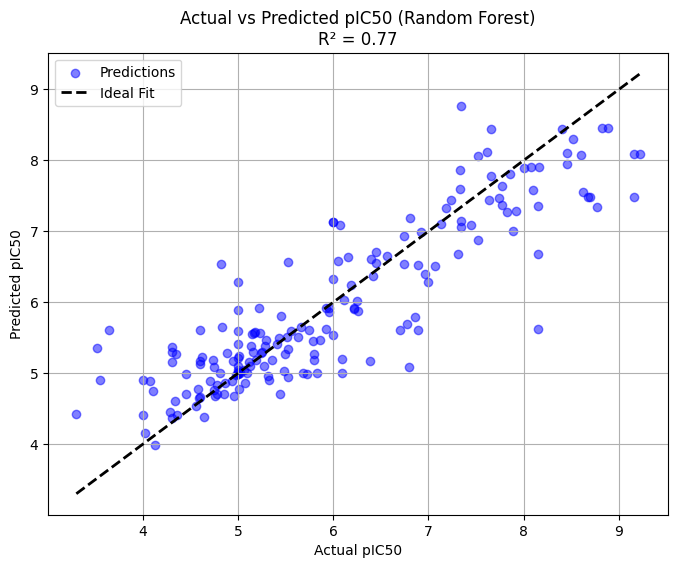

In [73]:
import matplotlib.pyplot as plt

Y_pred_rf = model_rf.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_rf, alpha=0.5, color='blue', label='Predictions')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual pIC50")
plt.ylabel("Predicted pIC50")
plt.title(f"Actual vs Predicted pIC50 (Random Forest)\nR² = {r2_rf:.2f}")
plt.legend()
plt.grid(True)
plt.show()